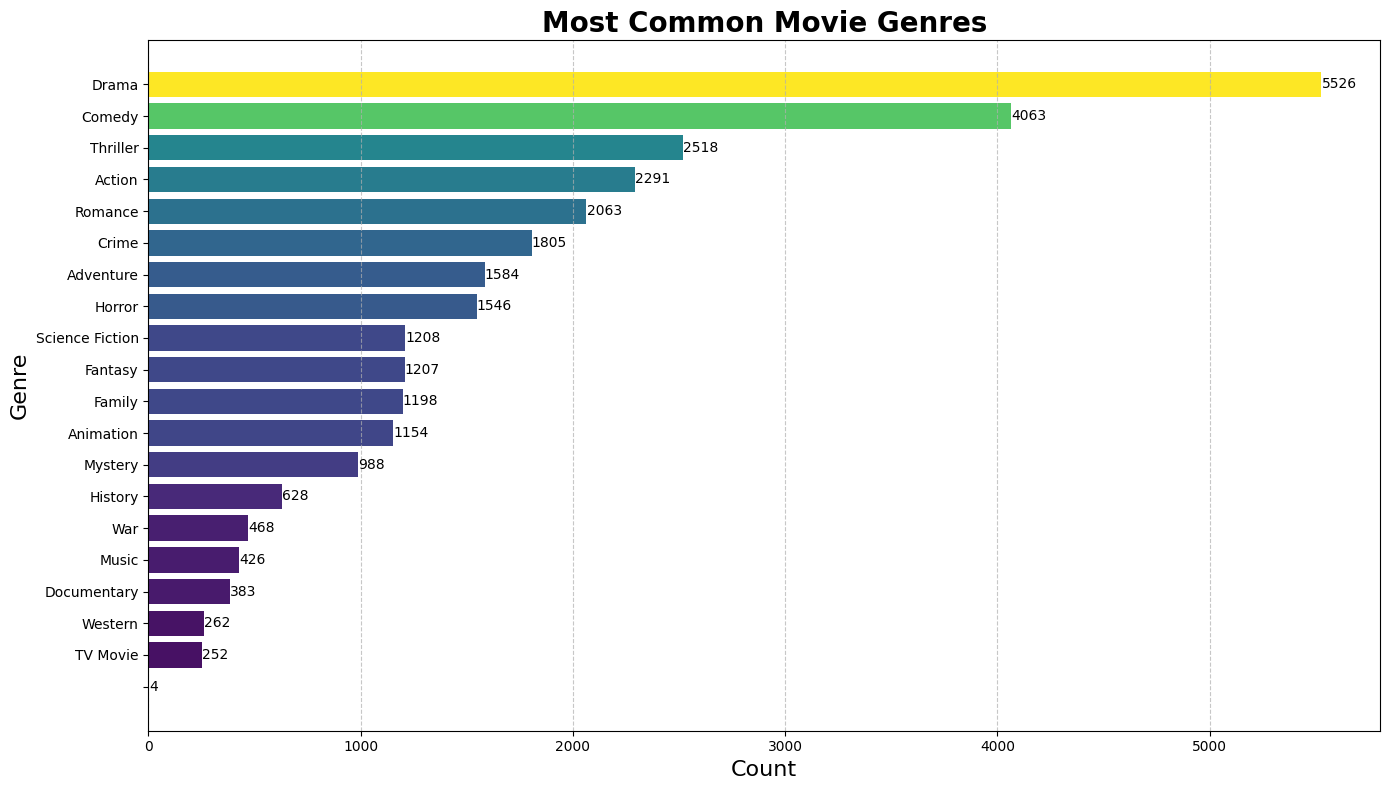

In [58]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Load the CSV file
file_path = 'top20k_movies_project2.csv'
movies_df = pd.read_csv(file_path)

# Step 1: Extract Genres
movies_df['Genres'] = movies_df['Genres'].fillna('')  # Handle missing values
all_genres = [genre.strip() for genres in movies_df['Genres'] for genre in genres.split(',')]

# Step 2: Count Genre Frequency
genre_counts = Counter(all_genres)

# Step 3: Create a DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=True)

# Step 4: Enhanced Bar Chart Visualization
plt.figure(figsize=(14, 8))
plt.barh(genre_df['Genre'], genre_df['Count'], color=plt.cm.viridis(genre_df['Count'] / max(genre_df['Count'])))
plt.title('Most Common Movie Genres', fontsize=20, weight='bold')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genre', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bar chart with counts
for index, value in enumerate(genre_df['Count']):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


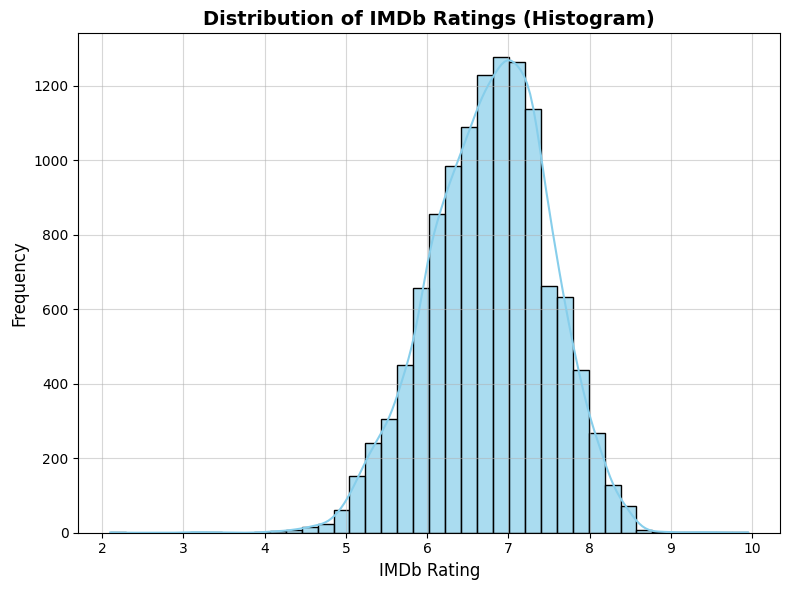

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract IMDb Ratings
ratings = movies_df['IMDb Rating'].dropna()

plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(ratings, bins=40, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of IMDb Ratings (Histogram)', fontsize=14, weight='bold')
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


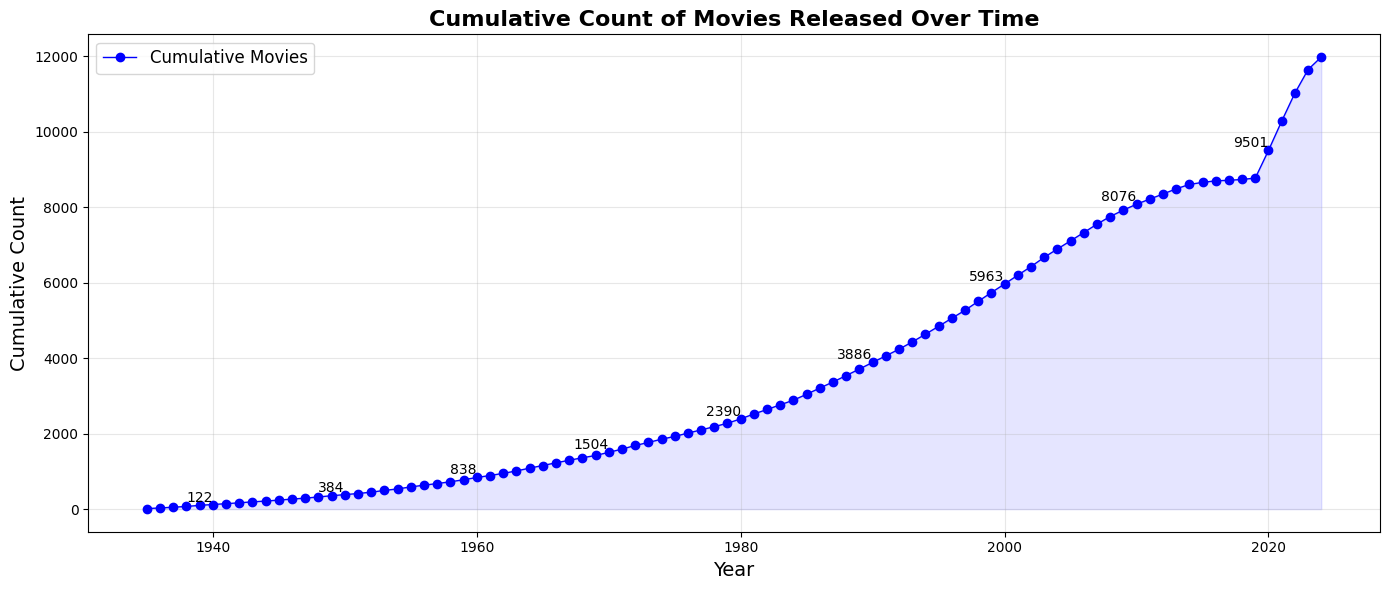

In [60]:
# Cumulative count of movies released over time
movies_per_year = movies_df['Release Year'].value_counts().sort_index()
cumulative_movies = movies_per_year.cumsum()

# Grouping data by decades for average rating trends
movies_df['Decade'] = (movies_df['Release Year'] // 10) * 10  # Extract decade
average_rating_by_decade = movies_df.groupby('Decade')['IMDb Rating'].mean()

# Enhanced Visualization: Cumulative Count of Movies Released Over Time
plt.figure(figsize=(14, 6))
plt.plot(cumulative_movies, marker='o', color='blue', label='Cumulative Movies', linewidth=1)
plt.fill_between(cumulative_movies.index, cumulative_movies, color='blue', alpha=0.1)
plt.title('Cumulative Count of Movies Released Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Count', fontsize=14)
for year, count in cumulative_movies.items():
    if year % 10 == 0:  # Annotate only for every 10 years for clarity
        plt.text(year, count, f"{count}", fontsize=10, ha='right', va='bottom', color='black')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

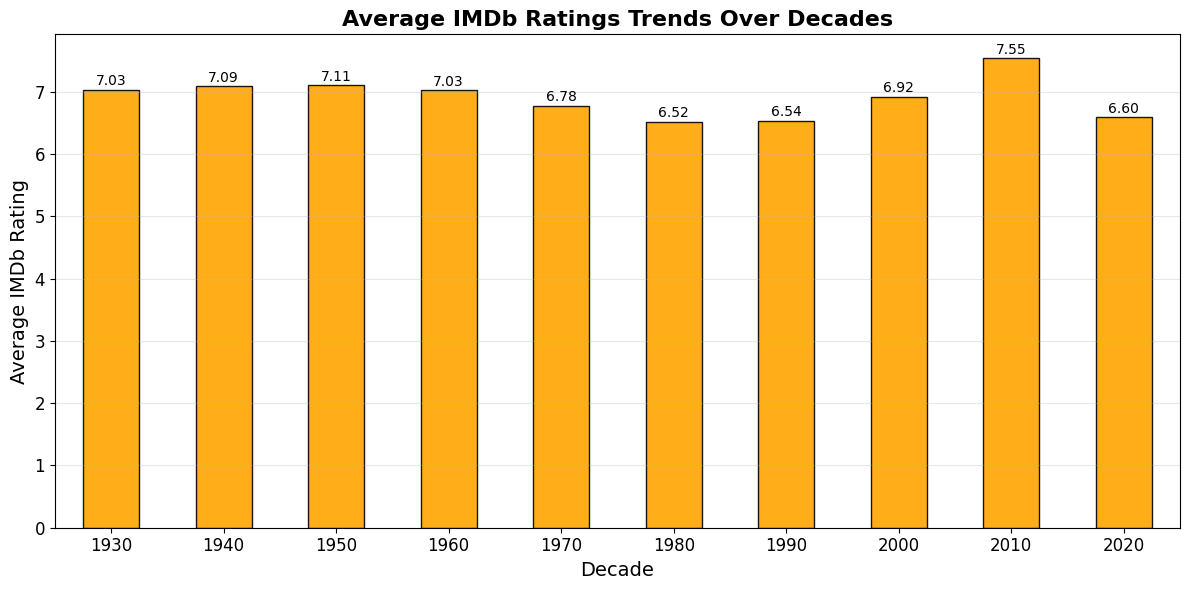

In [61]:
# Enhanced Visualization: Average IMDb Ratings Trends Over Decades
plt.figure(figsize=(12, 6))
bars = average_rating_by_decade.plot(kind='bar', color='orange', alpha=0.9, edgecolor='black')
plt.title('Average IMDb Ratings Trends Over Decades', fontsize=16, weight='bold')
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, axis='y')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


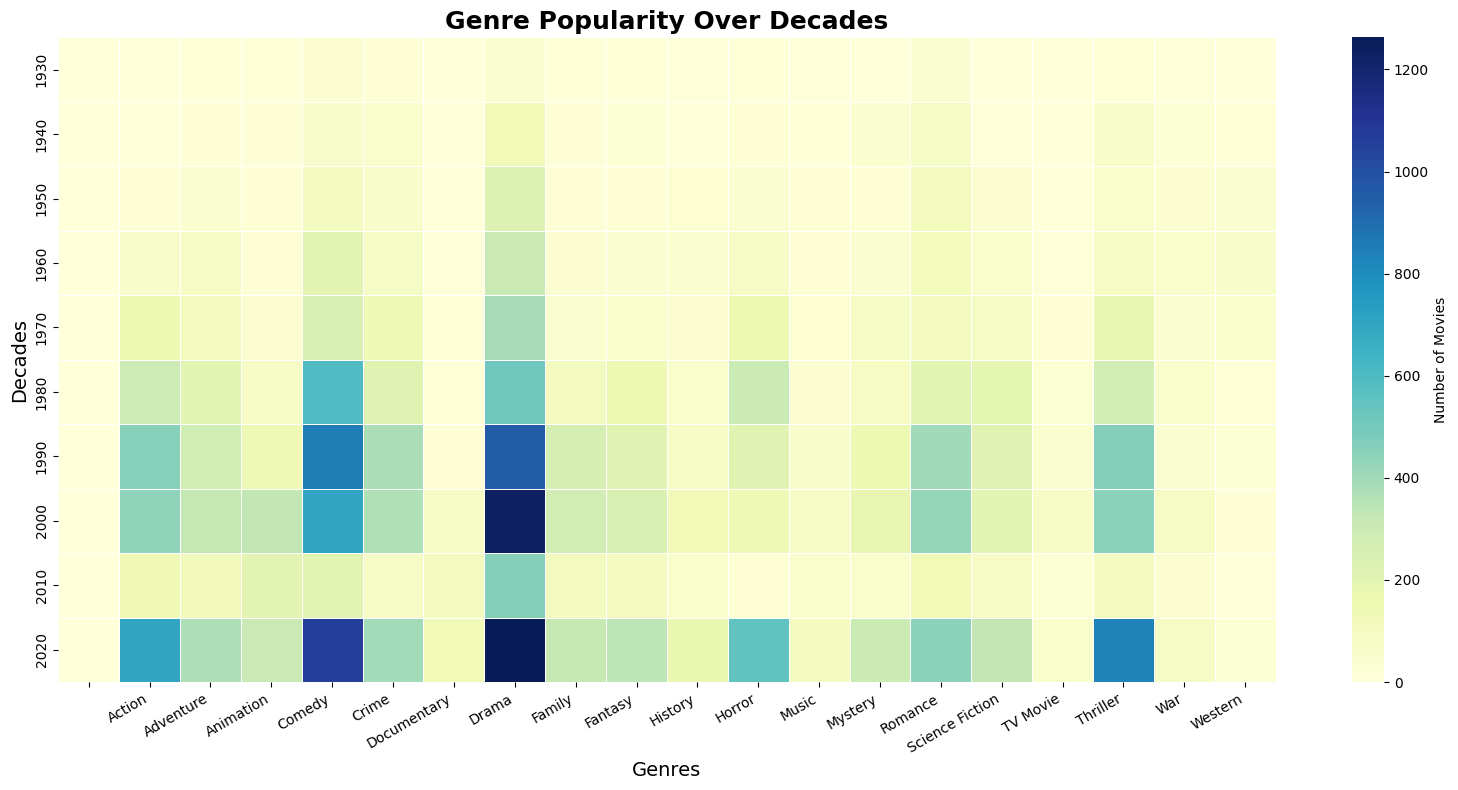

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'top20k_movies_project2.csv'
movies_data = pd.read_csv(file_path)

# Extract and preprocess genres and release years
movies_df = movies_df[['Genres', 'Release Year']].dropna()
movies_df['Release Year'] = movies_df['Release Year'].astype(int)
movies_df['Decade'] = (movies_df['Release Year'] // 10) * 10
movies_df = movies_df.assign(Genres=movies_df['Genres'].str.split(', '))
movies_exploded = movies_df.explode('Genres')

# Group by decade and genre, and count the occurrences
genre_decade_counts = movies_exploded.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    genre_decade_counts,
    cmap='YlGnBu',
    annot=False,
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Number of Movies'}
)
plt.title('Genre Popularity Over Decades', fontsize=18, weight='bold')
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Decades', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


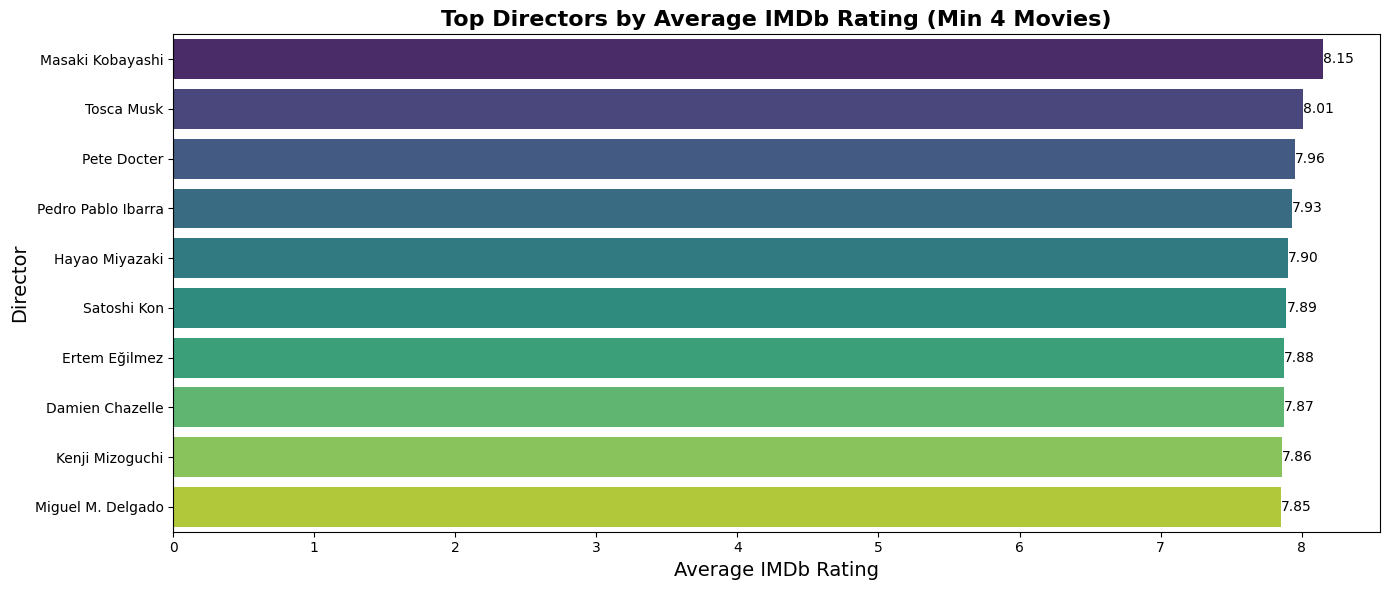

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'top20k_movies_project2.csv'  # Replace with your file path
movies_df = pd.read_csv(file_path)

# Filter necessary columns
director_data = movies_df[['Director', 'IMDb Rating', 'Title']].dropna()

# Group by directors and compute statistics
director_stats = director_data.groupby('Director').agg(
    Average_Rating=('IMDb Rating', 'mean'),
    Movie_Count=('Title', 'count')
).sort_values(by='Average_Rating', ascending=False)

# Top 10 directors by average IMDb rating (with at least 4 movies)
top_directors_avg_rating = director_stats[director_stats['Movie_Count'] >= 4].nlargest(10, 'Average_Rating')

# Plot: Top directors by average IMDb rating
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x=top_directors_avg_rating['Average_Rating'],
    y=top_directors_avg_rating.index,
    palette='viridis',
    hue=top_directors_avg_rating.index,
    dodge=False,  # Ensure no dodging since there's only one series
    legend=False  # No need for a legend in this case
)
for i, value in enumerate(top_directors_avg_rating['Average_Rating']):
    ax.text(value, i, f"{value:.2f}", va='center', ha='left', fontsize=10, color='black')
plt.title('Top Directors by Average IMDb Rating (Min 4 Movies)', fontsize=16, weight='bold')
plt.xlabel('Average IMDb Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()
plt.show()


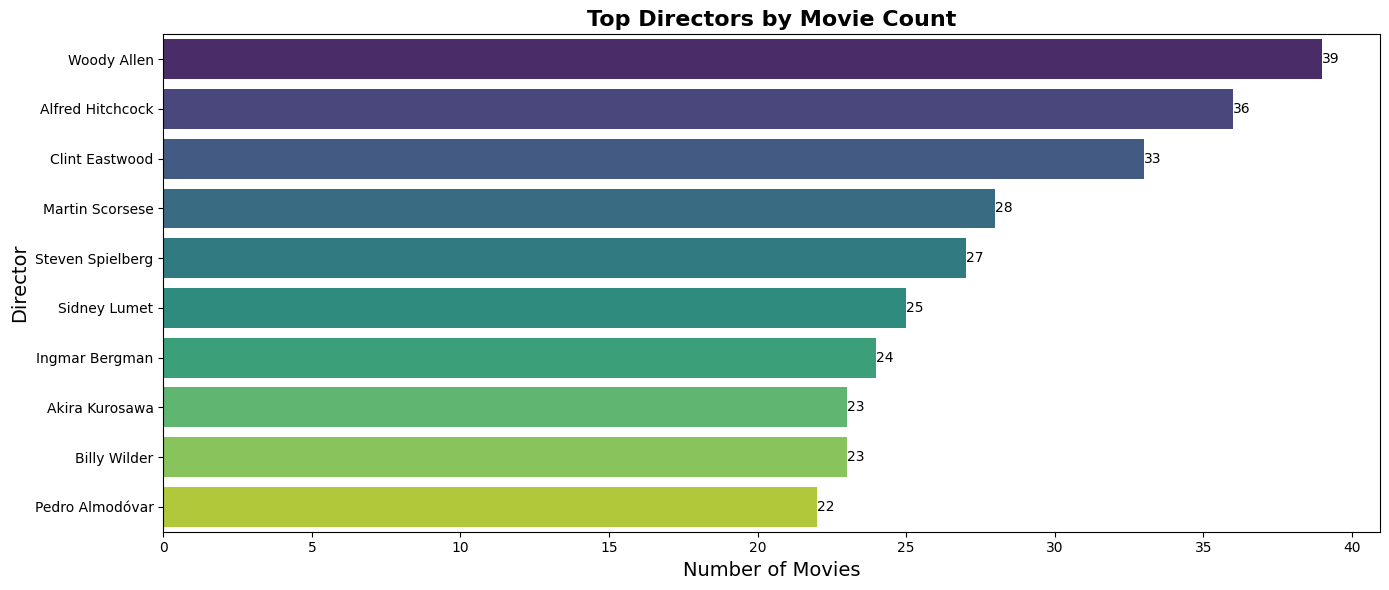

In [64]:
# Top 10 directors by movie count
top_directors_movie_count = director_stats.nlargest(10, 'Movie_Count')

# Plot: Top directors by movie count
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    x=top_directors_movie_count['Movie_Count'],
    y=top_directors_movie_count.index,
    palette='viridis',
    hue=top_directors_movie_count.index,
    dodge=False,  # Ensure no dodging since there's only one series
    legend=False  # No need for a legend in this case
)
for i, value in enumerate(top_directors_movie_count['Movie_Count']):
    ax.text(value, i, f"{value}", va='center', ha='left', fontsize=10, color='black')
plt.title('Top Directors by Movie Count', fontsize=16, weight='bold')
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

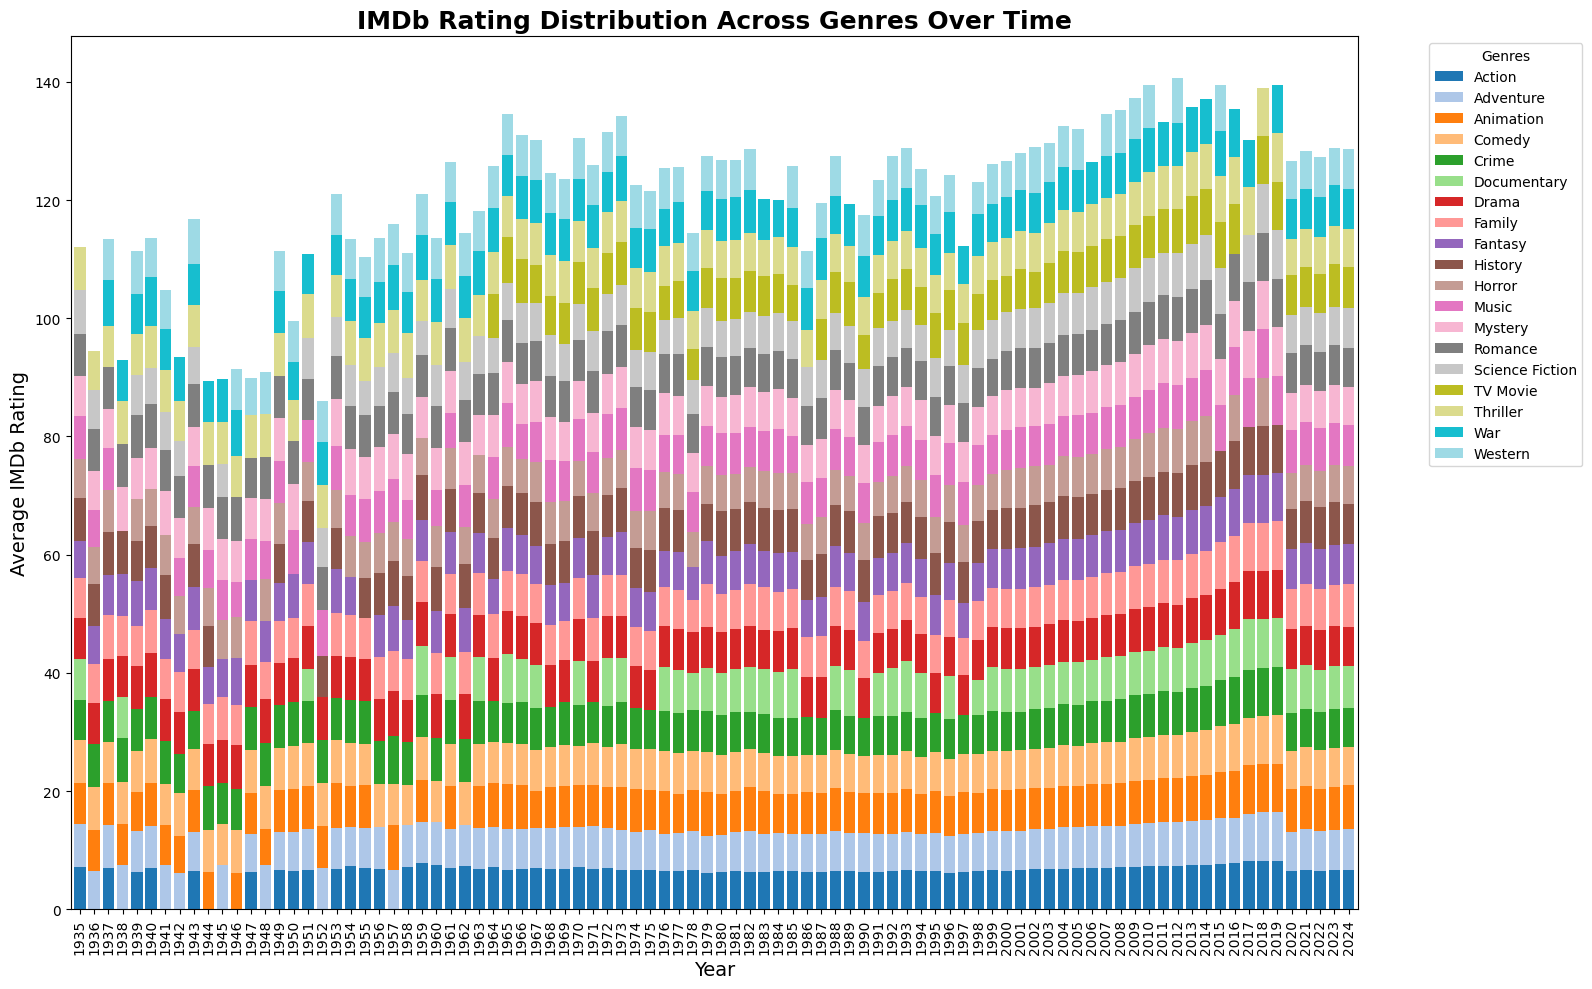

In [65]:
# Filter necessary columns and preprocess data
movies_df = movies_df[['Genres', 'IMDb Rating', 'Release Year']].dropna()

# Ensure 'Release Year' is integer for grouping
movies_df['Release Year'] = movies_df['Release Year'].astype(int)

# Split genres into individual rows
movies_df['Genres'] = movies_df['Genres'].str.split(', ')
movies_exploded = movies_df.explode('Genres')

# Group by year and genre to compute average IMDb rating for each genre per year
genre_year_rating = movies_exploded.groupby(['Release Year', 'Genres'])['IMDb Rating'].mean().unstack(fill_value=0)

# Sort data by year for consistency
genre_year_rating = genre_year_rating.sort_index()

# Plot stacked bar chart
plt.figure(figsize=(16, 10))
genre_year_rating.plot(
    kind='bar', 
    stacked=True, 
    figsize=(16, 10), 
    cmap='tab20', 
    width=0.8
)
plt.title('IMDb Rating Distribution Across Genres Over Time', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
file_path = '/Users/i2gunshaker/top11k_movies_cleaned2.csv'
movies_data = pd.read_csv(file_path)

columns_for_analysis = [col for col in movies_data.columns if not col.startswith('Genre_')]

# Perform statistical analysis for the selected columns
statistical_analysis = movies_data[columns_for_analysis].describe()

# Display the analysis
print("Statistical Analysis")
statistical_analysis


Statistical Analysis


,Release Year,IMDb Rating,Number of Votes,normalized_Release Year,normalized_IMDb Rating,normalized_Number of Votes
count,11976.000000,11976.000000,11976.000000,11976.000000,11976.000000,11976.000000
mean,1997.816800,6.773969,1079.673096,0.705807,0.595258,0.027351
std,21.380916,0.725715,2547.280737,0.240235,0.092424,0.069693
min,1935.000000,2.100000,80.000000,0.000000,0.000000,0.000000
25%,1985.000000,6.300000,150.000000,0.561798,0.534896,0.001915
50%,2001.000000,6.800000,284.000000,0.741573,0.598574,0.005581
75%,2020.000000,7.300000,794.250000,0.955056,0.662252,0.019542
max,2024.000000,9.952000,36630.000000,1.000000,1.000000,1.000000


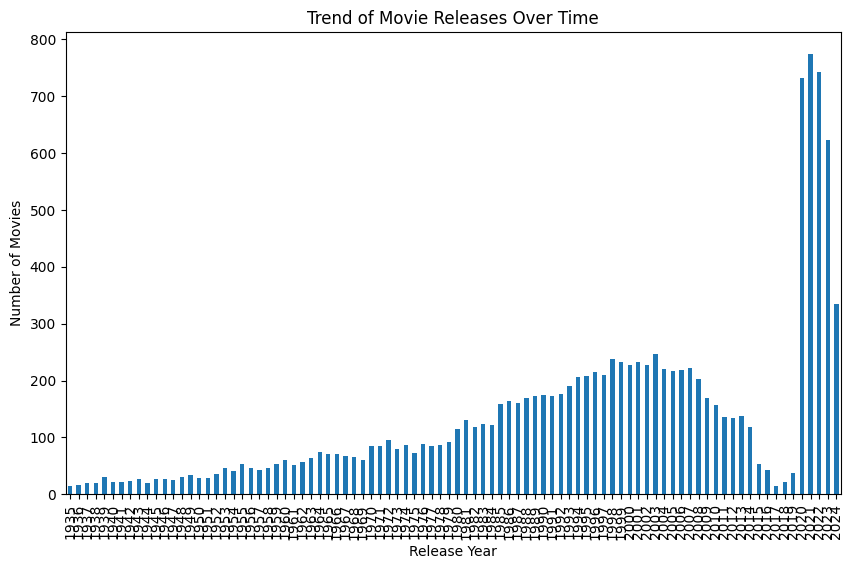

In [4]:
import matplotlib.pyplot as plt
# Trend in movie releases over time
plt.figure(figsize=(10, 6))
movies_data['Release Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

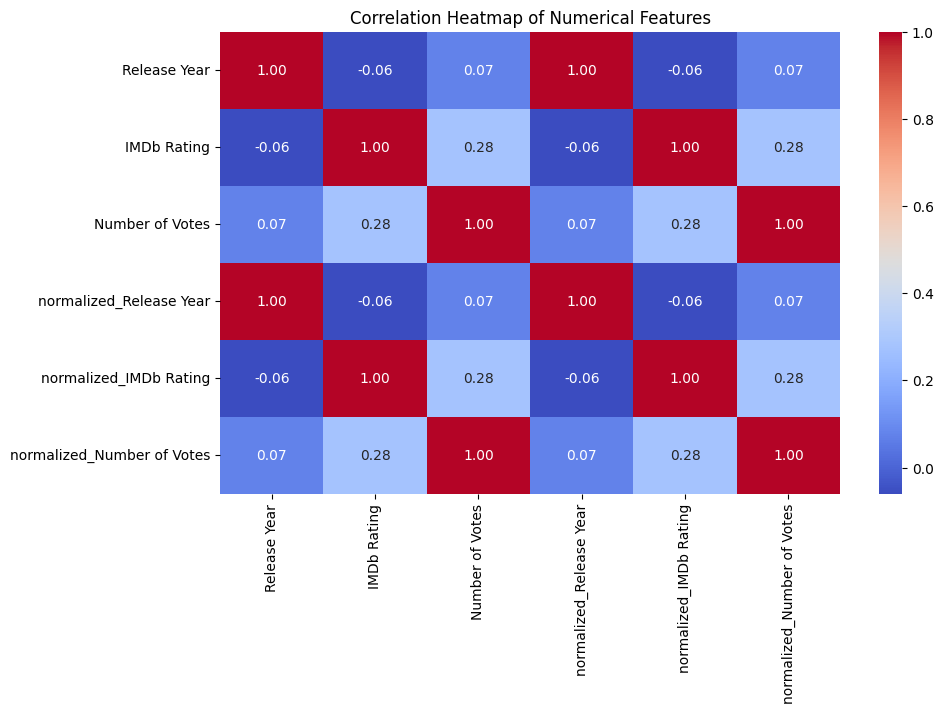

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = [
    col for col in movies_data.select_dtypes(include=['float64', 'int64']).columns
    if not col.startswith('Genre_')
]

# Compute correlation matrix 
correlation_matrix = movies_data[numerical_features].corr()

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


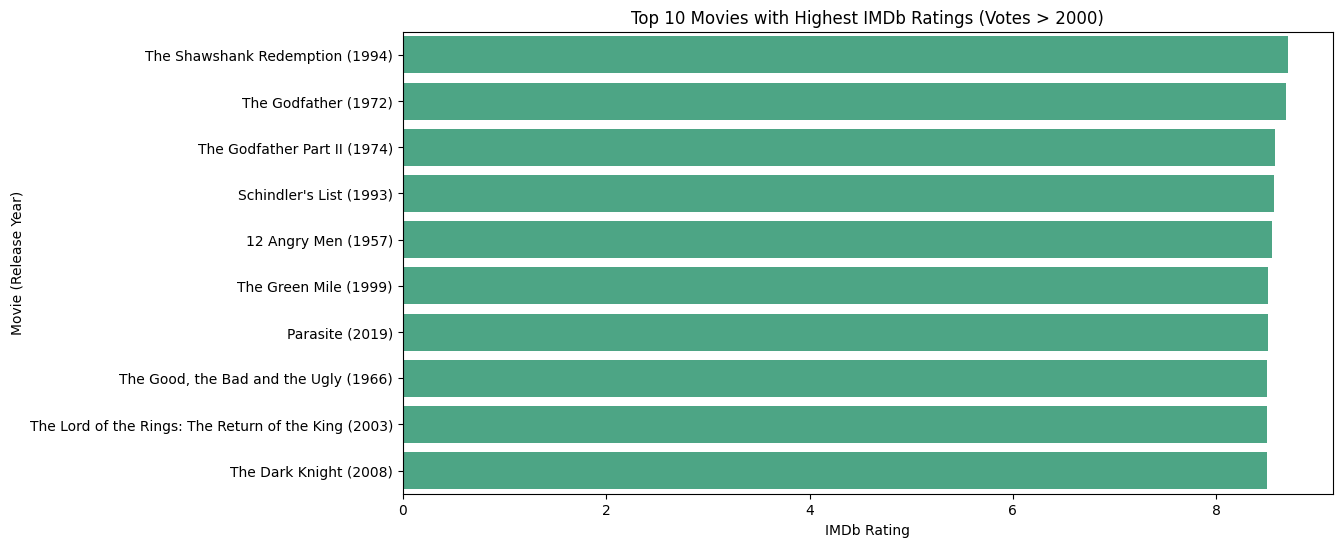

In [13]:
# Filter movies with more than 2000 votes
filtered_movies = movies_data[movies_data['Number of Votes'] > 2000]

# Top 10 movies with the highest IMDb ratings among filtered movies
top_10_movies = filtered_movies[['Title_Release_Year', 'IMDb Rating']].sort_values(
    by='IMDb Rating', ascending=False).head(10)

# Plot the top 10 movies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_movies, x='IMDb Rating', y='Title_Release_Year', color='#3EB489')
plt.title('Top 10 Movies with Highest IMDb Ratings (Votes > 2000)')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie (Release Year)')
plt.show()


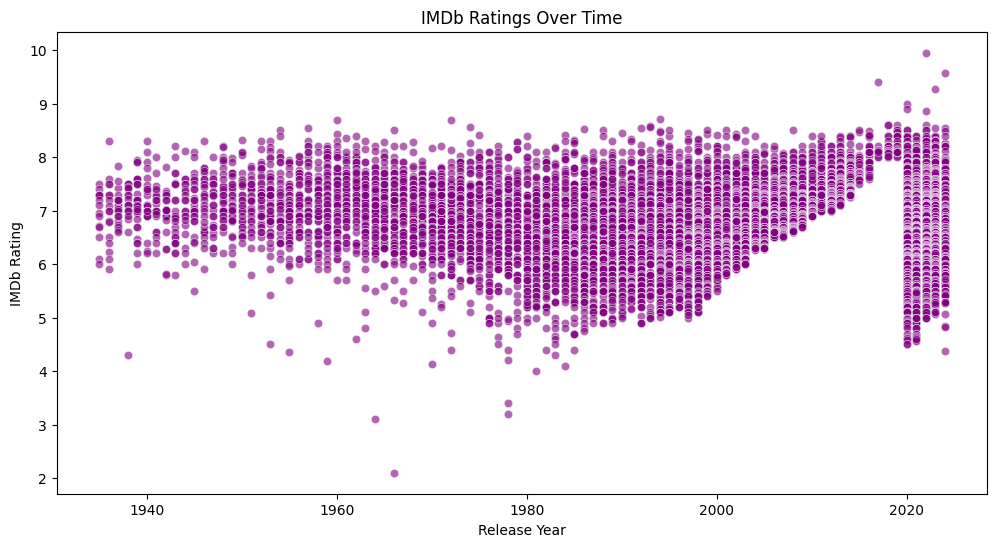

In [14]:
# Scatter plot of IMDb ratings over time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_data, x='Release Year', y='IMDb Rating', alpha=0.6, color='purple')
plt.title('IMDb Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.show()


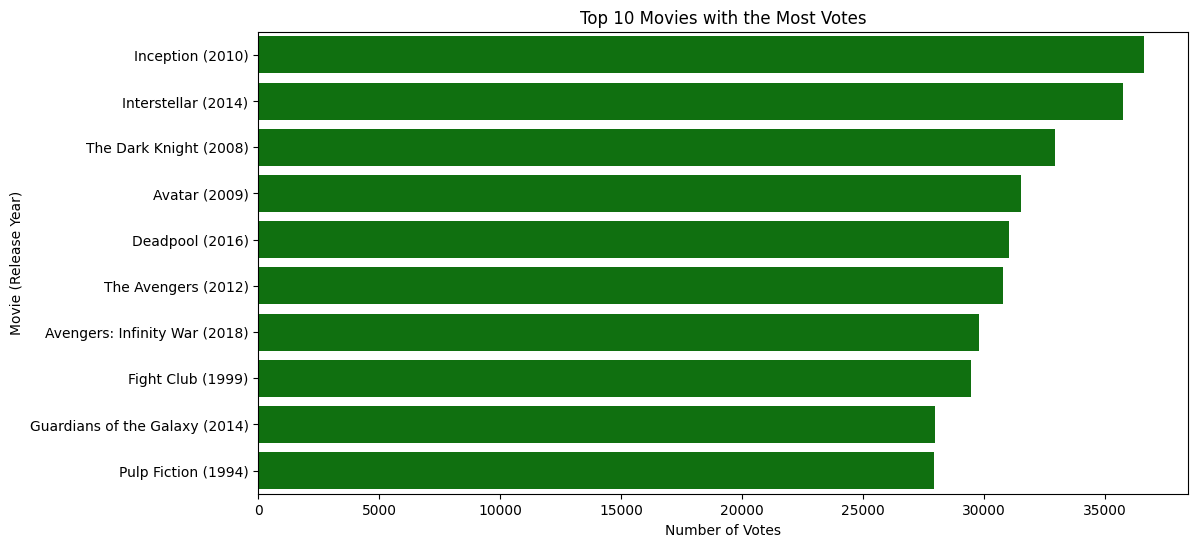

In [15]:
# Top 10 movies with the most votes
top_10_votes = movies_data[['Title_Release_Year', 'Number of Votes']].sort_values(
    by='Number of Votes', ascending=False).head(10)

# Plot the top 10 movies with the most votes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_votes, x='Number of Votes', y='Title_Release_Year', color='green')
plt.title('Top 10 Movies with the Most Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Movie (Release Year)')
plt.show()
